In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import roc_curve, roc_auc_score
import joblib
from sklearn import preprocessing

In [ ]:
df = pd.read_csv('dataset_after_training.csv')
df

,Unnamed: 0,trend_id,name,start_date,end_date,percentage_increase,previous_start_date,previous_end_date,previous_trend_duration,previous_percentage,...,Storm_MA30,Storm_MA7,binaryverdict_grouchy,Grouchy SVM,BinaryVerdictBernadotte,Bernadotte SVM,binaryverdict_Marmont,bernadotte_random_forest,Marmont_random_forest,Grouchy_random_forest
0,0,2442,AAL,2/01/2018,19/01/2018,9.567842,NaN,NaN,NaN,NaN,...,91.406998,113.188484,1,1,1,1,1,1,1,1
1,1,2443,AAL,19/01/2018,12/02/2018,-13.727181,2/01/2018,19/01/2018,17.0,9.567842,...,93.899986,82.561386,0,0,1,1,1,1,1,0
2,2,2444,AAL,12/02/2018,12/03/2018,12.796965,19/01/2018,12/02/2018,24.0,-13.727181,...,77.541450,72.046951,1,1,1,1,1,1,1,1
3,3,2445,AAL,12/03/2018,10/05/2018,-25.592919,12/02/2018,12/03/2018,28.0,12.796965,...,80.524078,106.446976,0,0,1,1,1,1,1,0
4,4,2446,AAL,10/05/2018,1/06/2018,4.662224,12/03/2018,10/05/2018,59.0,-25.592919,...,134.853241,135.584061,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7035,7035,4233,X,6/04/2022,8/07/2022,-50.823333,28/01/2022,6/04/2022,68.0,83.367452,...,272.858765,208.559296,0,0,1,1,1,1,1,0
7036,7036,4234,X,8/07/2022,17/08/2022,32.690114,6/04/2022,8/07/2022,93.0,-50.823333,...,119.005142,88.629929,1,1,1,1,1,1,1,1
7037,7037,4235,X,17/08/2022,4/10/2022,-12.617617,8/07/2022,17/08/2022,40.0,32.690114,...,139.338638,131.046768,0,0,1,1,1,1,1,0
7038,7038,4236,X,4/10/2022,7/12/2022,30.445420,17/08/2022,4/10/2022,48.0,-12.617617,...,133.855667,157.646835,1,1,1,1,1,1,1,1


In [ ]:
df.columns

Index(['Unnamed: 0', 'trend_id', 'name', 'start_date', 'end_date',
       'percentage_increase', 'previous_start_date', 'previous_end_date',
       'previous_trend_duration', 'previous_percentage', 'classification',
       'derivative', 'level', 'duration', 'harpoon_output_signal',
       'harpoon_fuel', 'harpoon_burnout', 'harpoon_h9', 'harpoon_h21',
       'harpoon_h14', 'top_gun_output_signal', 'top_gun_top_gun_a',
       'top_gun_top_gun_b', 'top_gun_fuel', 'top_gun_burnout',
       'maverick_output_signal', 'maverick_fuel', 'maverick_burnout',
       'wind_output_signal', 'wind_crossover', 'sonar_output_signal',
       'sonar_fuel', 'sonar_burnout', 'DAY', 'Coverage', 'Storm',
       'Storm_Actual', 'Storm_Impact', 'date', 'Storm_MA30', 'Storm_MA7',
       'binaryverdict_grouchy', 'Grouchy SVM', 'BinaryVerdictBernadotte',
       'Bernadotte SVM', 'binaryverdict_Marmont', 'bernadotte_random_forest',
       'Marmont_random_forest', 'Grouchy_random_forest'],
      dtype='object')

In [ ]:
X = df[['previous_trend_duration','previous_percentage','harpoon_output_signal','harpoon_fuel','harpoon_burnout','harpoon_h9','harpoon_h21','harpoon_h14','top_gun_output_signal','top_gun_top_gun_a','top_gun_top_gun_b','top_gun_fuel','top_gun_burnout','maverick_output_signal','maverick_fuel','maverick_burnout','wind_output_signal','wind_crossover','sonar_output_signal','sonar_fuel','sonar_burnout','Storm','Storm_Actual','Storm_Impact','Storm_MA30','Storm_MA7','binaryverdict_grouchy', 'BinaryVerdictBernadotte',
        'binaryverdict_Marmont', 'bernadotte_random_forest',
       'Marmont_random_forest', 'Grouchy_random_forest']]
y = df['classification']

In [ ]:
  X_np = np.array(X)
  column_means = np.nanmean(X_np, axis=0)
  nan_indices = np.isnan(X_np)
  X_np[nan_indices] = np.take(column_means, np.where(nan_indices)[1])


In [ ]:
X.iloc[0]

previous_trend_duration            NaN
previous_percentage                NaN
harpoon_output_signal         0.000000
harpoon_fuel                  0.000000
harpoon_burnout               0.000000
harpoon_h9                    0.194838
harpoon_h21                   0.242528
harpoon_h14                   0.230074
top_gun_output_signal         0.000000
top_gun_top_gun_a            85.824697
top_gun_top_gun_b            90.162612
top_gun_fuel                  0.000000
top_gun_burnout               0.000000
maverick_output_signal       78.312343
maverick_fuel                68.367492
maverick_burnout              0.000000
wind_output_signal           66.270483
wind_crossover               43.982966
sonar_output_signal           0.956342
sonar_fuel                   58.771990
sonar_burnout                48.877009
Storm                       188.690567
Storm_Actual                 94.054878
Storm_Impact                278.937103
Storm_MA30                   91.406998
Storm_MA7                

In [ ]:
X.describe().round(2)

,previous_trend_duration,previous_percentage,harpoon_output_signal,harpoon_fuel,harpoon_burnout,harpoon_h9,harpoon_h21,harpoon_h14,top_gun_output_signal,top_gun_top_gun_a,...,Storm_Actual,Storm_Impact,Storm_MA30,Storm_MA7,binaryverdict_grouchy,BinaryVerdictBernadotte,binaryverdict_Marmont,bernadotte_random_forest,Marmont_random_forest,Grouchy_random_forest
count,6897.00,6897.00,6604.0,6604.0,6604.0,6604.00,6532.00,6604.00,6604.0,6604.00,...,7040.00,7040.00,7040.00,7040.00,7040.00,7040.00,7040.00,7040.00,7040.00,7040.00
mean,35.93,2.05,0.0,0.0,0.0,0.13,0.14,0.14,0.0,49.64,...,79.55,149.48,102.17,102.13,0.51,0.95,0.89,0.97,0.92,0.51
std,26.09,18.41,0.0,0.0,0.0,0.08,0.07,0.08,0.0,30.40,...,56.37,89.36,42.77,47.64,0.50,0.22,0.31,0.18,0.27,0.50
min,2.00,-85.12,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,...,0.00,7.89,57.81,38.50,0.00,0.00,0.00,0.00,0.00,0.00
25%,19.00,-7.19,0.0,0.0,0.0,0.05,0.09,0.07,0.0,22.24,...,39.08,90.31,78.14,73.59,0.00,1.00,1.00,1.00,1.00,0.00
50%,29.00,0.24,0.0,0.0,0.0,0.14,0.15,0.15,0.0,49.38,...,67.10,130.31,91.41,89.47,1.00,1.00,1.00,1.00,1.00,1.00
75%,47.00,9.39,0.0,0.0,0.0,0.21,0.20,0.21,0.0,76.83,...,104.20,188.73,110.65,113.66,1.00,1.00,1.00,1.00,1.00,1.00
max,225.00,233.28,0.0,0.0,0.0,0.25,0.25,0.25,0.0,100.00,...,393.73,816.15,341.66,439.83,1.00,1.00,1.00,1.00,1.00,1.00


In [ ]:
# X_np = np.array(X)
X_np[0]

array([3.59317094e+01, 2.05041148e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.94838445e-01, 2.42527773e-01, 2.30073987e-01,
       0.00000000e+00, 8.58246970e+01, 9.01626118e+01, 0.00000000e+00,
       0.00000000e+00, 7.83123430e+01, 6.83674916e+01, 0.00000000e+00,
       6.62704835e+01, 4.39829659e+01, 9.56342486e-01, 5.87719904e+01,
       4.88770094e+01, 1.88690567e+02, 9.40548782e+01, 2.78937103e+02,
       9.14069977e+01, 1.13188484e+02, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(X_np)

In [ ]:
normalized_features[0]

array([0.15216013, 0.27378494, 0.        , 0.        , 0.        ,
       0.76970118, 0.95818904, 0.90923878, 0.        , 0.85824697,
       0.90162612, 0.        , 0.        , 0.89672294, 0.76124529,
       0.        , 0.6879764 , 0.66846765, 0.78882439, 0.02006618,
       0.02251507, 0.33610383, 0.23888449, 0.33534461, 0.11835684,
       0.18610957, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

In [ ]:


le = preprocessing.LabelEncoder()
le.fit(df.classification)
df['categorical_label'] = le.transform(df.classification)
df['categorical_label']

0       4
1       2
2       1
3       2
4       7
       ..
7035    2
7036    5
7037    2
7038    1
7039    2
Name: categorical_label, Length: 7040, dtype: int64

In [ ]:
y = df.categorical_label

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(normalized_features,y,test_size=0.3)

In [ ]:
np.count_nonzero(np.isnan(normalized_features))

0

In [ ]:
y_test.shape

(2112,)

In [ ]:
X_train_norm = normalize(X_train)
X_train_norm[0]

array([0.09553151, 0.1583712 , 0.        , 0.        , 0.        ,
       0.11680981, 0.06535529, 0.09249514, 0.        , 0.16447296,
       0.1530439 , 0.        , 0.        , 0.14234293, 0.17084377,
       0.        , 0.12667362, 0.10204851, 0.1425445 , 0.00967563,
       0.01108895, 0.04165573, 0.03822921, 0.03449874, 0.00274955,
       0.00954464, 0.        , 0.44382347, 0.44382347, 0.44382347,
       0.44382347, 0.        ])

In [ ]:
X_train.shape

(4928, 32)

In [ ]:
model = keras.Sequential([
    # Dense means all the neurons in 1 st layer connect with all the neuron in 2nd layer
    keras.layers.Dense(50,input_shape=(32,),activation = 'relu'),
    keras.layers.Dense(8,activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    # sparce means out output is an integer that is basically train_y
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(X_train,y_train,epochs = 500)

Epoch 1/500
154/154 [==============================] - 1s 2ms/step - loss: 1.3956 - accuracy: 0.5379
Epoch 2/500
154/154 [==============================] - 0s 2ms/step - loss: 0.8098 - accuracy: 0.7459
Epoch 3/500
154/154 [==============================] - 0s 2ms/step - loss: 0.6661 - accuracy: 0.7573
Epoch 4/500
154/154 [==============================] - 0s 2ms/step - loss: 0.6103 - accuracy: 0.7595
Epoch 5/500
154/154 [==============================] - 0s 2ms/step - loss: 0.5822 - accuracy: 0.7638
Epoch 6/500
154/154 [==============================] - 0s 2ms/step - loss: 0.5663 - accuracy: 0.7664
Epoch 7/500
154/154 [==============================] - 0s 2ms/step - loss: 0.5564 - accuracy: 0.7670
Epoch 8/500
154/154 [==============================] - 0s 2ms/step - loss: 0.5490 - accuracy: 0.7675
Epoch 9/500
  1/154 [..............................] - ETA: 0s - loss: 0.6608 - accuracy: 0.7188

KeyboardInterrupt: ignored

In [ ]:
joblib.dump(model,'1st_iteration_NN_model_with_normalizedData.pkl')

In [ ]:
model_path  ='1st_iteration_NN_model.pkl'

In [ ]:
model = joblib.load('1st_iteration_NN_model_with_normalizedData.pkl')

In [ ]:
predicted_normalized_features  = model.predict(normalized_features)
predicted_label_full_dataset = [np.argmax(i) for i in predicted_normalized_features]


220/220 [==============================] - 0s 1ms/step


In [ ]:
model.evaluate(normalized_features,y)

220/220 [==============================] - 1s 3ms/step - loss: 0.4601 - accuracy: 0.8105


[0.46007558703422546, 0.8105113506317139]

In [ ]:
cm = tf.math.confusion_matrix(labels = y,predictions = predicted_label_full_dataset)
cm

<tf.Tensor: shape=(8, 8), dtype=int32, numpy=
array([[ 350,    0,    0,    0,    0,    0,    0,    0],
       [   0,  115,    0,    0,   11,  103,   71,   87],
       [   0,    0, 3443,    0,    0,    0,    0,    0],
       [   0,    0,    0,  761,    0,    0,    0,    0],
       [   0,   43,    0,    0,   25,  117,   30,   26],
       [   0,   38,    0,    0,   14,  338,   27,   44],
       [   0,  115,    0,    0,    9,  109,  195,  165],
       [   0,   87,    0,    0,   10,   86,  142,  479]], dtype=int32)>

In [ ]:
original_labels = le.inverse_transform(np.unique(y))

In [ ]:
original_labels

array(['Marshal Bernadotte', 'Marshal Davout', 'Marshal Grouchy',
       'Marshal Marmont', 'Marshal Messena', 'Marshal Murat',
       'Marshal Ney', 'Marshal Oudinot'], dtype=object)

Text(83.2222222222222, 0.5, 'Truth')

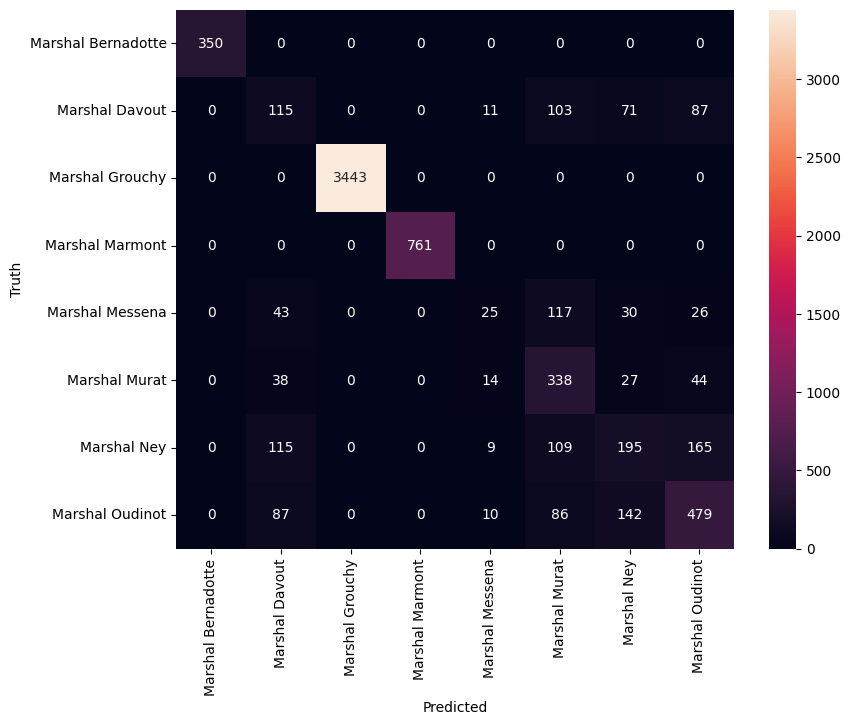

In [ ]:
import seaborn as sn
plt.figure(figsize = (9,7))
sn.heatmap(cm,annot = True, fmt = 'd',xticklabels=original_labels, yticklabels=original_labels)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
cm


<tf.Tensor: shape=(8, 8), dtype=int32, numpy=
array([[ 350,    0,    0,    0,    0,    0,    0,    0],
       [   0,  115,    0,    0,   11,  103,   71,   87],
       [   0,    0, 3443,    0,    0,    0,    0,    0],
       [   0,    0,    0,  761,    0,    0,    0,    0],
       [   0,   43,    0,    0,   25,  117,   30,   26],
       [   0,   38,    0,    0,   14,  338,   27,   44],
       [   0,  115,    0,    0,    9,  109,  195,  165],
       [   0,   87,    0,    0,   10,   86,  142,  479]], dtype=int32)>

In [ ]:
sum_rows  = np.sum(cm,axis=1)
cm1 = tf.convert_to_tensor(np.array([cm[i]/sum_rows[i] for i in range(len(cm))]))
# cm1 = cm[0]/sum_rows[0]


In [ ]:
cm2 = cm1*100
cm2

<tf.Tensor: shape=(8, 8), dtype=float64, numpy=
array([[100.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,  29.71576227,   0.        ,   0.        ,
          2.84237726,  26.61498708,  18.34625323,  22.48062016],
       [  0.        ,   0.        , 100.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , 100.        ,
          0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,  17.84232365,   0.        ,   0.        ,
         10.37344398,  48.54771784,  12.44813278,  10.78838174],
       [  0.        ,   8.24295011,   0.        ,   0.        ,
          3.03687636,  73.31887202,   5.85683297,   9.54446855],
       [  0.        ,  19.39291737,   0.        ,   0.        ,
          1.51770658,  18.38111298,  32.8836425 ,  27.82462057],
       [  0.        ,  10.82089552,   0.        ,

Text(83.2222222222222, 0.5, 'Truth')

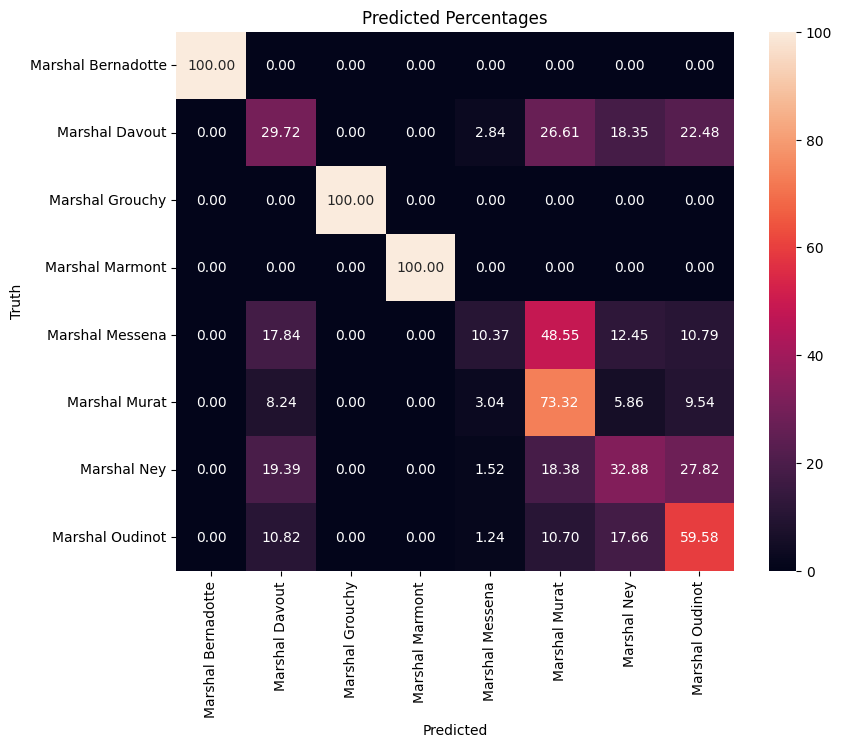

In [ ]:
plt.figure(figsize = (9,7))
sn.heatmap(cm2,annot = True, fmt = '.2f',xticklabels=original_labels, yticklabels=original_labels)
plt.title('Predicted Percentages')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
diagonal_entries_of_predicted_percentages = np.diagonal(cm2)

In [ ]:
predicted_percentages = {key:value for key,value in zip(original_labels,diagonal_entries_of_predicted_percentages)}
print(predicted_percentages)

{'Marshal Bernadotte': 100.0, 'Marshal Davout': 29.71576227390181, 'Marshal Grouchy': 100.0, 'Marshal Marmont': 100.0, 'Marshal Messena': 10.37344398340249, 'Marshal Murat': 73.31887201735357, 'Marshal Ney': 32.88364249578415, 'Marshal Oudinot': 59.5771144278607}


In [ ]:
list(predicted_percentages.keys())

['Marshal Bernadotte',
 'Marshal Davout',
 'Marshal Grouchy',
 'Marshal Marmont',
 'Marshal Messena',
 'Marshal Murat',
 'Marshal Ney',
 'Marshal Oudinot']

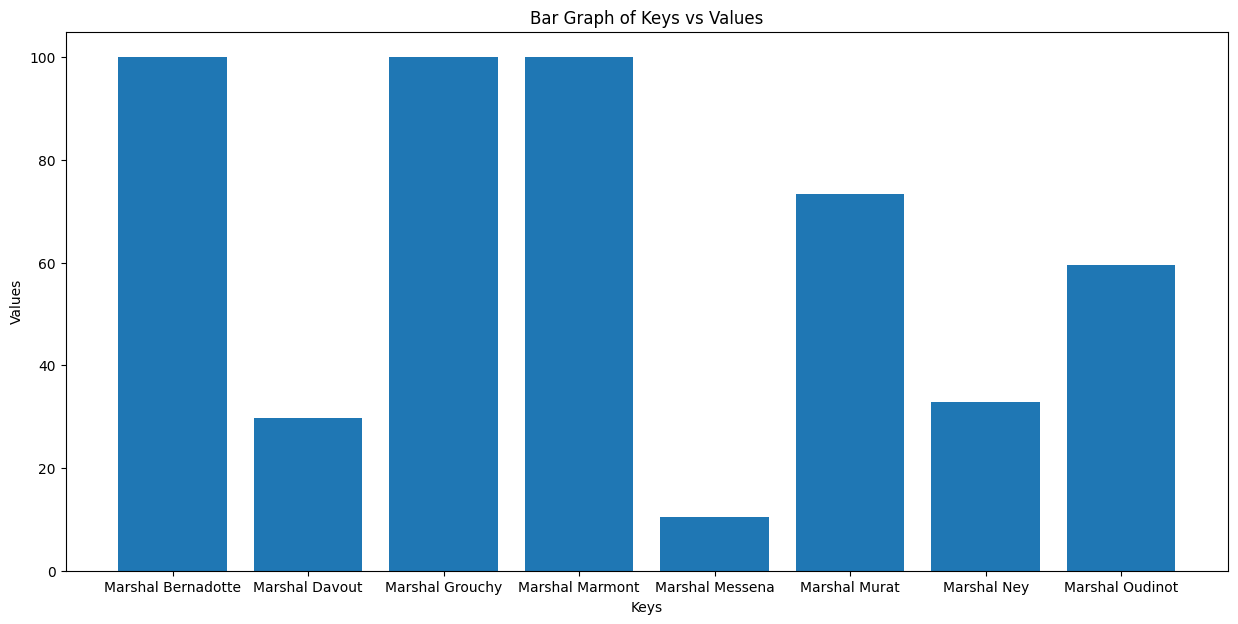

In [ ]:
plt.figure(figsize = (15,7))
plt.bar(predicted_percentages.keys(), predicted_percentages.values())

# Add labels and a title
plt.xlabel('Keys')
plt.ylabel('Values')
plt.title('Bar Graph of Keys vs Values')

# Display the graph
plt.show()